<a href="https://colab.research.google.com/github/Testeh69/ML_learning/blob/main/titanicSurvivor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [34]:
df_test = pd.read_csv("/content/drive/MyDrive/test.csv")
df_train = pd.read_csv("/content/drive/MyDrive/train.csv")

In [35]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [38]:
df_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that there are data that are missing in the column age, fare, cabin.
Two choices
 => delete this features
 =>remplace the data missing

In [40]:
df_train.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [41]:
from pandas.core.frame import DataFrame
def query_columns(dataframe:DataFrame, type_variable:list)->list:
  get_columns = dataframe.columns.tolist()
  get_columns_by_variable_target = [];
  result = []
  for column in get_columns:
    result.append(str(type(dataframe[column][0])))
    if str(type(dataframe[column][0])).replace("class","") in type_variable:
      get_columns_by_variable_target.append(column)
      print(result)
  return get_columns_by_variable_target

columns_target = query_columns(df_train,["< 'numpy.int64'>","< 'numpy.float64'>"])
print(df_train[columns_target].describe())



["<class 'numpy.int64'>"]
["<class 'numpy.int64'>", "<class 'numpy.int64'>"]
["<class 'numpy.int64'>", "<class 'numpy.int64'>", "<class 'numpy.int64'>"]
["<class 'numpy.int64'>", "<class 'numpy.int64'>", "<class 'numpy.int64'>", "<class 'str'>", "<class 'str'>", "<class 'numpy.float64'>"]
["<class 'numpy.int64'>", "<class 'numpy.int64'>", "<class 'numpy.int64'>", "<class 'str'>", "<class 'str'>", "<class 'numpy.float64'>", "<class 'numpy.int64'>"]
["<class 'numpy.int64'>", "<class 'numpy.int64'>", "<class 'numpy.int64'>", "<class 'str'>", "<class 'str'>", "<class 'numpy.float64'>", "<class 'numpy.int64'>", "<class 'numpy.int64'>"]
["<class 'numpy.int64'>", "<class 'numpy.int64'>", "<class 'numpy.int64'>", "<class 'str'>", "<class 'str'>", "<class 'numpy.float64'>", "<class 'numpy.int64'>", "<class 'numpy.int64'>", "<class 'str'>", "<class 'numpy.float64'>"]
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.

In [42]:
#Get the list of categorical values

string_columns = df_train.dtypes =="object"# object in pandas is the same as string in python
print(string_columns)
object_cols = list(string_columns[string_columns].index)
print(object_cols)

PassengerId    False
Survived       False
Pclass         False
Name            True
Sex             True
Age            False
SibSp          False
Parch          False
Ticket          True
Fare           False
Cabin           True
Embarked        True
dtype: bool
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [43]:
#remove the columns string from the original dataframe
drop_df_train = df_train.select_dtypes(exclude=["object"])
drop_df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [44]:
from sklearn.preprocessing import OrdinalEncoder
df_train_label = df_train.copy()
ordinal_encoder = OrdinalEncoder()
df_train_label[object_cols] = ordinal_encoder.fit_transform(df_train[object_cols])

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

<Axes: >

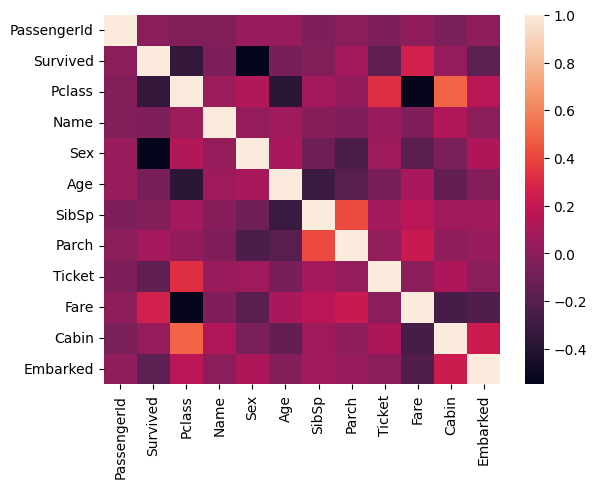

In [45]:
import seaborn as sns
print(df_train)
sns.heatmap(df_train_label.corr())

In [46]:
df_train_corr = df_train_label.corr()
print(df_train_corr["Survived"])

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Name          -0.057343
Sex           -0.543351
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Ticket        -0.164549
Fare           0.257307
Cabin          0.029619
Embarked      -0.169718
Name: Survived, dtype: float64


In [47]:
df_train_label = df_train_label.drop(["Name"], axis = 1)
df_train_label.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Ticket     Fare  \
0              1         0       3  1.0  22.0      1      0   523.0   7.2500   
1              2         1       1  0.0  38.0      1      0   596.0  71.2833   
2              3         1       3  0.0  26.0      0      0   669.0   7.9250   
3              4         1       1  0.0  35.0      1      0    49.0  53.1000   
4              5         0       3  1.0  35.0      0      0   472.0   8.0500   
..           ...       ...     ...  ...   ...    ...    ...     ...      ...   
886          887         0       2  1.0  27.0      0      0   101.0  13.0000   
887          888         1       1  0.0  19.0      0      0    14.0  30.0000   
888          889         0       3  0.0   NaN      1      2   675.0  23.4500   
889          890         1       1  1.0  26.0      0      0     8.0  30.0000   
890          891         0       3  1.0  32.0      0      0   466.0   7.7500   

     Cabi

In [48]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
imputed_df_train = pd.DataFrame(imputer.fit_transform(df_train_label))
imputed_df_train.columns = df_train_label.columns


In [49]:
imputed_df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,523.0,7.2500,76.0,2.0
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,596.0,71.2833,81.0,0.0
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,669.0,7.9250,76.0,2.0
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,49.0,53.1000,55.0,2.0
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,472.0,8.0500,76.0,2.0


In [50]:
imputed_df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [51]:
from sklearn.model_selection import train_test_split
df_train_target = imputed_df_train["Survived"]
df_train_label = imputed_df_train.drop("Survived", axis = 1)
df_train_label.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,3.0,1.0,22.0,1.0,0.0,523.0,7.2500,76.0,2.0
1,2.0,1.0,0.0,38.0,1.0,0.0,596.0,71.2833,81.0,0.0
2,3.0,3.0,0.0,26.0,0.0,0.0,669.0,7.9250,76.0,2.0
3,4.0,1.0,0.0,35.0,1.0,0.0,49.0,53.1000,55.0,2.0
4,5.0,3.0,1.0,35.0,0.0,0.0,472.0,8.0500,76.0,2.0


In [52]:
df_train_target.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(df_train_label,df_train_target,test_size=0.2,random_state=42)

In [54]:
print(X_train,y_train)

     PassengerId  Pclass  Sex        Age  SibSp  Parch  Ticket      Fare  \
331        332.0     1.0  1.0  45.500000    0.0    0.0    20.0   28.5000   
733        734.0     2.0  1.0  23.000000    0.0    0.0   228.0   13.0000   
382        383.0     3.0  1.0  32.000000    0.0    0.0   665.0    7.9250   
704        705.0     3.0  1.0  26.000000    1.0    0.0   398.0    7.8542   
813        814.0     3.0  0.0   6.000000    4.0    2.0   333.0   31.2750   
..           ...     ...  ...        ...    ...    ...     ...       ...   
106        107.0     3.0  0.0  21.000000    0.0    0.0   296.0    7.6500   
270        271.0     1.0  1.0  29.699118    0.0    0.0    47.0   31.0000   
860        861.0     3.0  1.0  41.000000    2.0    0.0   399.0   14.1083   
435        436.0     1.0  0.0  14.000000    1.0    2.0    33.0  120.0000   
102        103.0     1.0  1.0  21.000000    0.0    1.0   417.0   77.2875   

     Cabin  Embarked  
331   56.0       2.0  
733   76.0       2.0  
382   76.0       2

SVM

In [55]:
from sklearn import svm

ml_svm = svm.SVC()
ml_svm.fit(X_train,y_train)

SVC()

In [56]:
from logging import raiseExceptions
from sklearn.metrics import accuracy_score

def accuracy(X_test,y_test, ml_model):

  y_pred = ml_model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

print(accuracy(X_test,y_test, ml_svm))

0.7094972067039106


In [57]:
#normalization of the data
from sklearn.preprocessing import StandardScaler

scaler_normalization = StandardScaler()
X_train_normalized = scaler_normalization.fit_transform(X_train)
X_test_normalized = scaler_normalization.transform(X_test)


In [58]:
def train_ml_svm(X_train,y_train):
  model_svm = svm.SVC()
  model_svm.fit(X_train,y_train)
  return model_svm

ml_svm_two = train_ml_svm(X_train_normalized,y_train)
print("svm accuracy: ",round(accuracy(X_test_normalized,y_test,ml_svm_two)*100,2),"%")

svm accuracy:  81.56 %


In [61]:
print(len(X_train_normalized))
print(len(y_train))

712
712


In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Assuming X_train_normalized, y_train, X_test_normalized, y_test are defined

# Create a pipeline with StandardScaler and SVM
svm_clf = Pipeline([
    ("scaler", StandardScaler()),  # Tuple for StandardScaler
    ("model", SVC())                # Tuple for SVM model
])

# Fit the pipeline on the training data
svm_clf.fit(X_train_normalized, y_train)

# Print accuracy on the test set
print("SVM accuracy:", round(accuracy(X_test_normalized, y_test, svm_clf) * 100, 2), "%")


SVM accuracy: 81.56 %


In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# Create a pipeline with StandardScaler and an ensemble of classifiers
multi_model_pipeline = Pipeline([
    ("scaler", StandardScaler()),                     # Tuple for StandardScaler
    ("model", VotingClassifier(estimators=
     [
      ('svc', SVC()),
             ("Tree", DecisionTreeClassifier()),

     ('rf', RandomForestClassifier()),

      ('knn', KNeighborsClassifier()),
       ], voting="hard"))  # Tuple for ensemble model
])
#print(multi_model_pipeline.named_steps) ->print a dict
print(multi_model_pipeline.named_steps["model"].estimators[0])
multi_model_pipeline.fit(X_train_normalized, y_train)
print("accuracy ->",round(multi_model_pipeline.score(X_test_normalized, y_test)*100,2),"%")


('svc', SVC())
accuracy -> 81.56 %


In [107]:
def estimate_best_ml_algorithm(pipeline,X_train=X_train_normalized, y_train= y_train, X_test = X_test_normalized, y_test=y_test)-> dict:
  result_best_ml_algorithm = {"model" : "", "result" : 0}
  list_ml_algorithm_in_pipeline = pipeline.named_steps["model"].estimators
  print(list_ml_algorithm_in_pipeline)
  for name,model in list_ml_algorithm_in_pipeline:
    model.fit(X_train,y_train)
    result = model.score(X_test, y_test)
    if result*100 > result_best_ml_algorithm["result"]:
      result_best_ml_algorithm["model"] = "{}".format(model)
      result_best_ml_algorithm["result"] = round(result*100,2)
  return result_best_ml_algorithm

result_ml = estimate_best_ml_algorithm(multi_model_pipeline)
print(result_ml)

[('svc', SVC()), ('Tree', DecisionTreeClassifier()), ('rf', RandomForestClassifier()), ('knn', KNeighborsClassifier())]
{'model': 'RandomForestClassifier()', 'result': 83.24}


In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

pipeline_fine_tuning_forest_ml_algorithm = Pipeline([
    ("Scaler", StandardScaler()),
    ("model", RandomForestClassifier())])

pipeline_fine_tuning_forest_ml_algorithm.fit(X_train,y_train)
result = round(pipeline_fine_tuning_forest_ml_algorithm.score(X_test,y_test),2)*100
#fine tune the model

param_grid = {
    'model__n_estimators': [x*50 for x in range(1,4)],
    'model__max_depth' : [None,10,20],
    'model__min_samples_split': [2,5,10],
    'model__min_samples_leaf':[x for x in range(1,5)]
}
grid_search = GridSearchCV(pipeline_fine_tuning_forest_ml_algorithm, param_grid, cv=5, scoring="accuracy", n_jobs = -1)
grid_search.fit(X_train,y_train)
result_fine_tuning = round(grid_search.score(X_test,y_test),2)*100

print("accuracy ->", result,"%")
print("accuracy fine tune model ->", result, "%")

accuracy -> 82.0 %
accuracy fine tune model -> 82.0 %


In [114]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 50}
